      Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0              1                  6.9                            3.8   
1              2                  5.3                            3.5   
2              3                  5.1                            3.9   
3              4                  6.5                            2.1   
4              5                  8.1                            0.6   
...          ...                  ...                            ...   
1995        1996                  6.5                            0.2   
1996        1997                  6.3                            2.8   
1997        1998                  6.2                            0.0   
1998        1999                  8.1                            0.7   
1999        2000                  9.0                            1.7   

      Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
0                     8.7                   2.8   
1                     8.0        

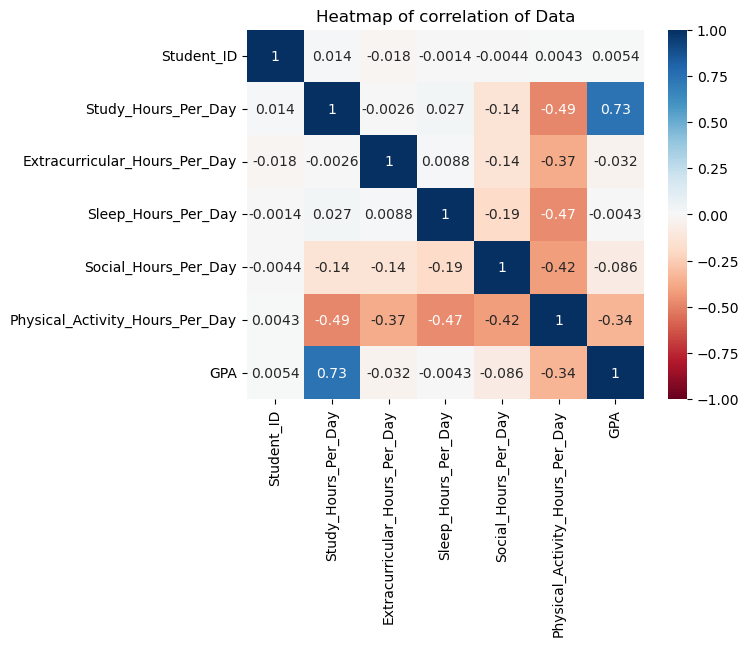

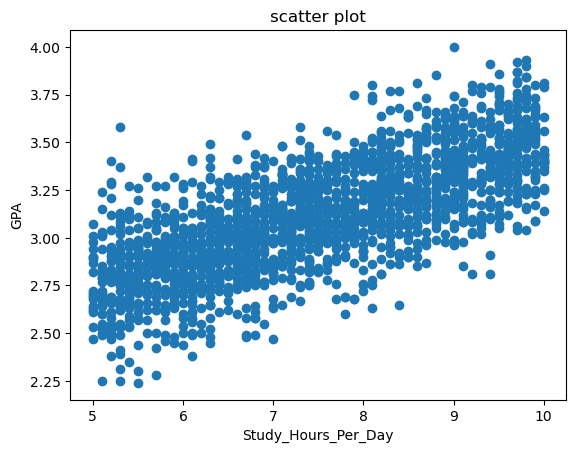

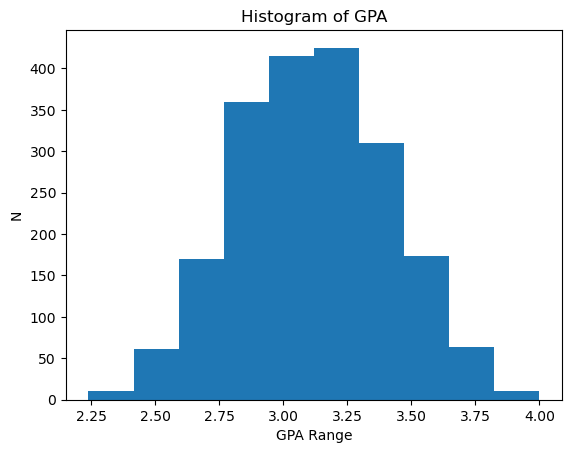

a = 0.15 +/- 0.00
b = 1.96 +/- 0.02


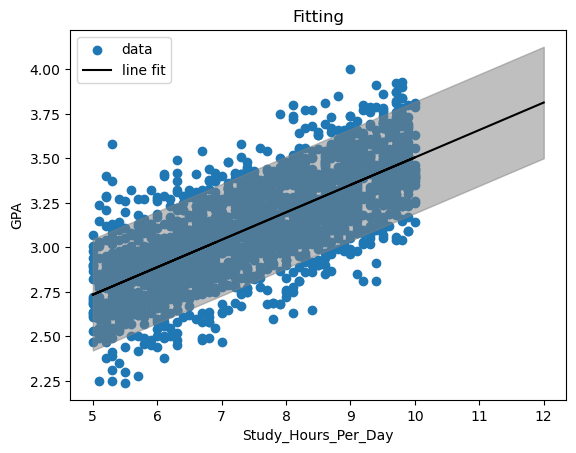

 2 clusters silhoutte score = 0.50
 3 clusters silhoutte score = 0.41
 4 clusters silhoutte score = 0.35
 5 clusters silhoutte score = 0.36
 6 clusters silhoutte score = 0.36
 7 clusters silhoutte score = 0.34
 8 clusters silhoutte score = 0.34
 9 clusters silhoutte score = 0.34
10 clusters silhoutte score = 0.34
Best number of clusters =  2


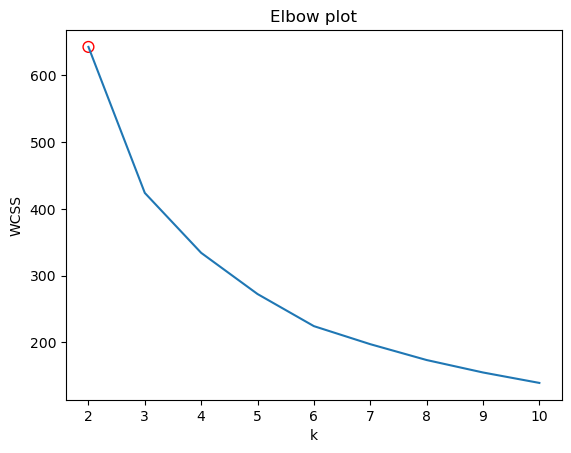

<Figure size 640x480 with 0 Axes>

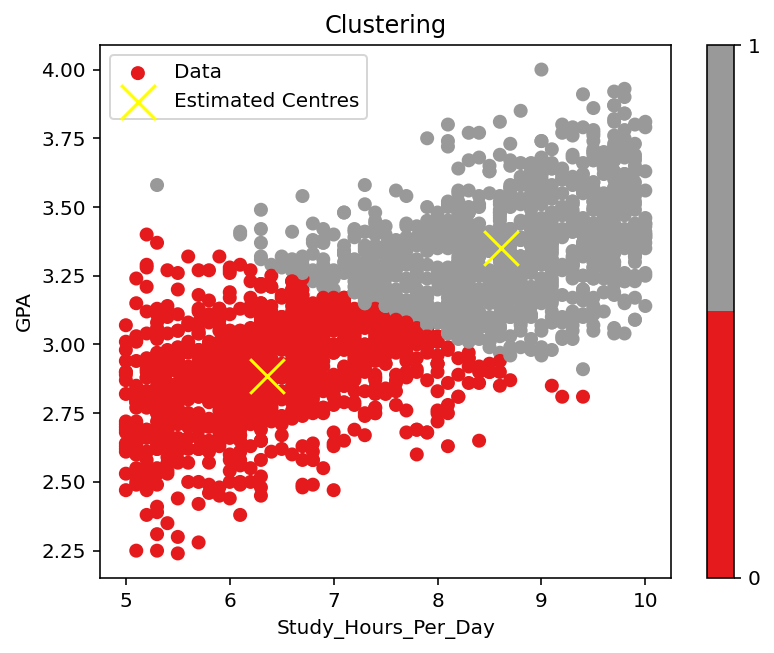

In [45]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler
from matplotlib.colors import ListedColormap


def linearfunc(x, a, b):
    """
    This function is a linear fit function
    responsible for fitting data in a straight
    line
    input parameters
          x - input data
          a - parameter to be fitted
          b - parameter to be fitted
    output parameters
          y - contains the fitted data
    """
    
    # equation of a straight line 
    y = a * x + b

    return y


def fittingfunc(x, y):
    """
    This function will be responsible for
    fitting
    input parameters
          x - independent variable
          y - input data
    """
    
    # call the curve_fit function
    p, cov = curve_fit(linearfunc, x, y)

    # caluclating errors
    sigma = np.sqrt(np.diag(cov))

    # print the errors
    print(f"a = {p[0]:.2f} +/- {sigma[0]:.2f}")

    # print the errors
    print(f"b = {p[1]:.2f} +/- {sigma[1]:.2f}")

    # create a new figure for plotting
    plt.figure(0)

    # plot x and y
    plt.scatter( df["Study_Hours_Per_Day"], df["GPA"], label = "data")
    
    # plot the fitting data
    plt.plot(df["Study_Hours_Per_Day"], linearfunc(df["Study_Hours_Per_Day"], p[0], p[1]), 
             "k-", label = "line fit")
    
    # variable to store data for the prediction
    xpredict = np.linspace(np.min(df["Study_Hours_Per_Day"]), 12, 200)

    # predicted data
    xpredictfut = linearfunc(xpredict, p[0], p[1])

    # caluclating uncertainity in prediction
    for i in xpredict:
        uncertainity = np.std(linearfunc( xpredict, p[0], p[1] ))
    
    # plotting prediction data
    plt.plot(xpredict, linearfunc(xpredict, p[0], p[1]), "k-")
    
    # plotting uncertainity in prediction
    plt.fill_between(xpredict, xpredictfut - uncertainity, xpredictfut + uncertainity,  
                     color="gray", alpha = 0.5)

    # add x axis label
    plt.xlabel("Study_Hours_Per_Day")

    # add y axis label
    plt.ylabel("GPA")

    # add title to plot
    plt.title("Fitting")

    # add legend
    plt.legend(loc = "upper left")

    # show plot
    plt.show()
    
    return


def clustfun(data):
    """
    This function is responsible for clustering
    input parameter
          data -  data for clustering
    """
    
    # variable for scaling
    scaler = RobustScaler()

    # scaling the input data
    scaleddata = scaler.fit_transform(data)

    # variable to store inertia value
    wcss = []

    # initalize the variables
    best_n, best_score = None, -np.inf

    # assuming the number of clusters
    for n in range(2, 11):
        
        # assume the cluster
        kmeans = KMeans(n_clusters = n, n_init = 20)
        
        # Fit the data
        kmeans.fit(scaleddata)

        # variable to store labels
        labels = kmeans.labels_
    
        # calculate the silhoutte score
        score = silhouette_score(scaleddata, labels)

        # variable having inertia values
        inertia = kmeans.inertia_

        # store the inertia value
        wcss.append(inertia)
        
        # store the best number of clusters and best silhoutte score
        if score > best_score:
            best_n = n
            best_score = score

        # print the values 
        print(f"{n:2g} clusters silhoutte score = {score:0.2f}")

    # print best number of clusters
    print(f"Best number of clusters = {best_n:2g}")

    #plot elbow plot
    plotelbowmethod(2, 10, wcss, best_n)

    # do the inverse scaling
    inv_scaleddata = scaler.inverse_transform(scaleddata)
    
    # at this point we know what is the best number of clusters
    # clustering based on known best number of clusters
    kmeans = KMeans(n_clusters = best_n, n_init = 20)
    
    # fit the data
    kmeans.fit(scaleddata)   

    # store labels
    labels = kmeans.labels_
    
    # the estimated cluster centres
    cen = scaler.inverse_transform(kmeans.cluster_centers_)

    # centers values along x axis
    xkmeans = cen[:, 0]

    # centers values along y axis
    ykmeans = cen[:, 1]

    # store the labels
    cenlabels = kmeans.predict(kmeans.cluster_centers_)

    # plot the clustered data
    plotclustereddata(labels, inv_scaleddata, xkmeans, ykmeans)
    
    return


def plotelbowmethod(mink, maxk, wcss, best_n):
    """
    This function is responsible for plotting elbow
    method
    input parameters
          mink   - vminimum number of clusters
          maxk   - vmaximum number of clusters
          wcss   - stores inertia values
          best_n - Best number of clusters
    """
    
    # create a new figure
    plt.figure(1)

    # plotting elbow method
    plt.plot(range(mink, maxk + 1), wcss)

    # indicating the best number of clusters
    plt.scatter(best_n, wcss[best_n - mink], marker = "o", color = "red", 
                facecolors = "none", s = 60)

    # label x axis
    plt.xlabel('k')

    # label y axis
    plt.ylabel('WCSS')  

    # add title to plot
    plt.title("Elbow plot")

    # show plot
    plt.show()
    
    return


def plotclustereddata(labels, inv_scaleddata, xkmeans, ykmeans):
    """
    This function is responsible for plotting clustered data
    input parameters
          labels         - stores the labels
          inv_scaleddata - variale having inverse scaled version of data
          xkmeans        - center values along x axis
          ykmeans        - center values along y axis
    """
    
    # create a new figure
    plt.figure(3)

    # variable used to define color map
    colours = plt.cm.Set1(np.linspace(0, 1, len(np.unique(labels))))

    # define color map
    cmap = ListedColormap(colours)

    # start a subplot
    fig, ax = plt.subplots(dpi=144)
    
    # plotting inverse scaled data
    s = ax.scatter(inv_scaleddata[:, 0], inv_scaleddata[:, 1], c = labels, 
                   cmap = cmap, marker = "o", label = "Data")

    # plotting cluster centers
    ax.scatter(xkmeans, ykmeans, marker = "x", color = "yellow", s = 300, 
               label = "Estimated Centres")

    # set color bar
    cbar = fig.colorbar(s, ax = ax)

    # setting ticks
    cbar.set_ticks(np.unique(labels))

    # adding legend to plot
    ax.legend()

    # set x axis label
    ax.set_xlabel("Study_Hours_Per_Day")

    # set y axis label
    ax.set_ylabel("GPA")

    # add title to plot
    ax.set_title("Clustering")

    # show plot
    plt.show()  
    
    return


def displaydata(df):
    """
    this function responsible for displaying
    data in dataframe
    input parameter
          df - data read from csv
    """
    
    # show the dataframe
    print(df)
    
    # create a new figure
    plt.figure(2)

    # plot heatmap
    sns.heatmap(df.corr(numeric_only = True), vmin = -1, 
                vmax = 1, cmap = "RdBu", annot = True)

    # add title to plot
    plt.title("Heatmap of correlation of Data")

    # create a new figure
    plt.figure(4)

    # plot scatter plot
    plt.scatter( df["Study_Hours_Per_Day"], df["GPA"])

    # add label for x axis
    plt.xlabel("Study_Hours_Per_Day")
    
    # add label for y axis
    plt.ylabel("GPA")
    
    # add title for plot
    plt.title("scatter plot")

    # show plot
    plt.show()

    # create a new figure
    plt.figure(5)

    # plot histogram
    plt.hist(df["GPA"])

    # add x axis label
    plt.xlabel("GPA Range")

    # add y axis label
    plt.ylabel("N")

    # add title to plot
    plt.title("Histogram of GPA")

    # show plot
    plt.show()
    
    return

# read the csv file
df = pd.read_csv("student_lifestyle_dataset.csv")

# copy the data to perform clustering
data_clust = df[["Study_Hours_Per_Day", "GPA"]].copy()

# call the function to display data
displaydata(df)

# call fitting function for fitting
fittingfunc(df["Study_Hours_Per_Day"], df["GPA"])

# call clustering function for clustering
clustfun(data_clust)